# Granules

In [1]:
import starepandas
import geopandas
import pystare
import matplotlib.pyplot as plt
import importlib
import copy

In [2]:
fname = '../tests/data/granules/MOD05_L2.A2019336.0000.061.2019336211522.hdf'
modis = starepandas.read_granule(fname, latlon=True, sidecar=True, xy=True)

In [3]:
modis = copy.copy(modis[(modis.y>250) & (modis.x<150)])

In [4]:
modis

,lat,lon,sids,x,y,Scan_Start_Time,Solar_Zenith,Solar_Azimuth,Sensor_Zenith,Sensor_Azimuth,Water_Vapor_Infrared
67770,64.289093,-16.075922,3662037656027565065,0,251,8.493986e+08,136.769997,-17.160000,65.359999,-87.399998,NaN
67771,64.298607,-16.575207,3662124605389551017,1,251,8.493986e+08,136.689997,-17.820000,64.739999,-87.849998,NaN
67772,64.305969,-17.040155,3662126430541234153,2,251,8.493986e+08,136.619997,-18.440000,64.129999,-88.269998,NaN
67773,64.311798,-17.501287,3662105186047635465,3,251,8.493986e+08,136.549997,-19.060000,63.529999,-88.689998,NaN
67774,64.315926,-17.928263,3732481344770526057,4,251,8.493986e+08,136.489997,-19.620000,62.929999,-89.079998,NaN
...,...,...,...,...,...,...,...,...,...,...,...
109495,69.114990,-47.227417,3744993157413528587,145,405,8.493987e+08,126.089997,-51.889999,4.470000,69.109998,NaN
109496,69.095970,-47.343407,3744993282781123915,146,405,8.493987e+08,126.069997,-52.029999,4.920000,68.649998,NaN
109497,69.076836,-47.459351,3744993705556370667,147,405,8.493987e+08,126.049997,-52.169999,5.370000,68.239998,NaN
109498,69.057602,-47.575237,3744992437391885067,148,405,8.493987e+08,126.019997,-52.309999,5.820000,67.879998,NaN


In [5]:
trixels = modis.make_trixels()
modis.set_trixels(trixels, inplace=True)

In [6]:
geom = geopandas.points_from_xy(modis.lon, modis.lat)
modis.set_geometry(geom, inplace=True)

<AxesSubplot:>

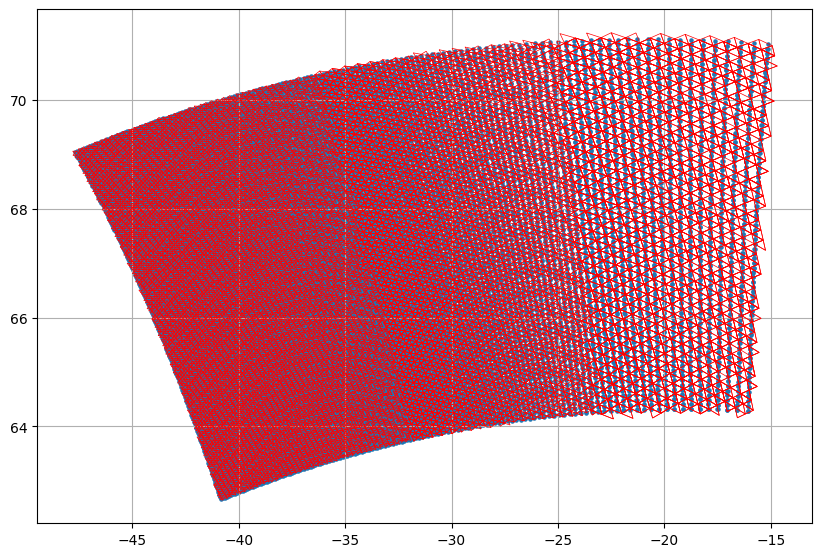

In [7]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
ax.grid(True)

modis.plot(trixels=False, ax=ax, marker='.', markersize=20)
modis.plot(trixels=True, color='r', ax=ax, lw=0.5)

#plt.savefig('modis.png')

## Plotting footprints

In [8]:
fname = '../tests/data/granules/MOD05_L2.A2019336.0000.061.2019336211522.hdf'
mod05 = starepandas.io.granules.Mod05(fname)

In [9]:
mod05.read_sidecar_cover()
mod05.stare_cover

masked_array(data=[3614138700964823044, 3616390500778508292,
                   3618642300592193540, ..., 4298608878511194121,
                   4298613276557705225, 4298668252139094025],
             mask=False,
       fill_value=999999)

## Manually getting the 2D STARE array

In [10]:
import netCDF4
from pyhdf.SD import SD
import numpy
import pystare
import datetime

In [11]:
hdf = SD(fname)
lon = hdf.select('Longitude').get().astype(numpy.double)
lat = hdf.select('Latitude').get().astype(numpy.double)

In [12]:
start = datetime.datetime.now()
sids = pystare.from_latlon_2d(lat=lat, lon=lon, adapt_level=True)
datetime.datetime.now()-start

datetime.timedelta(microseconds=985640)

In [13]:
print(pystare.spatial_resolution(sids).min())
print(pystare.spatial_resolution(sids).max())

9
11


## Intersecting Data 

In [14]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.sort_values(by='name', inplace=True)
world = starepandas.STAREDataFrame(world)
sids = world.make_sids(level=6)
world.set_sids(sids, inplace=True)
trixels = world.make_trixels()
world.set_trixels(trixels, inplace=True)

<AxesSubplot:>

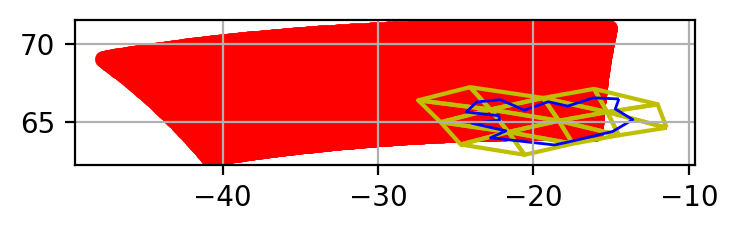

In [15]:
fig, ax = plt.subplots(figsize=(4,4), dpi=200)
ax.grid(True)

country = world[world.name=='Iceland']
country.plot(ax=ax, trixels=True, boundary=True, color='y', zorder=1)
country.plot(ax=ax, trixels=False, facecolor="none", edgecolor='blue', zorder=1)
modis.plot(ax=ax, color='red', trixels=False, zorder=0, linewidth=0.1)

In [16]:
a = modis.stare_intersects(country['sids'].iloc[0])
a.any()

True

In [17]:
len(country['sids'].iloc[0])

17